The spiral dataset is available in the spiral-dataset.csv file. The file contains three columns, 
corresponding to the X and Y coordinates in the Cartesian plane, as well as the cluster 
number in the third column of the csv file are to denote only the membership of each data 
point to one of the three clusters. Please note that the cluster numbers are irrelevant in 
clustering as it is an unsupervised learning algorithm. However, as we happen to have the 
true clustering results here, we can leverage this extra information to evaluate the 
clustering results externally, a metric affectionately called the RandIndex (an extrinsic 
metric for evaluation), besides measuring the sum-of-squared-error (intrinsic metric) 
which you can find in my lecture note. More on this is explained in a separate section 
below (page 3& 4). Please continue reading.   


◦ It should be noted that this type of dataset is difficult to cluster! But, I have trust in you; you 
are clever enough to employ the appropriate clustering algorithm to properly cluster the 
dataset. You need to explore most of the clustering approaches you learned in the class.   


◦ You may assume that there is no need to normalize the dataset.  
◦ Use the Euclidean distance measure for all the distance calculations.  
◦ NO LIBRARY FUNCTIONS OF k-means and hierarchical clustering WILL BE ALLOWED.   

In [1]:
#import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
from random import sample
from statistics import mean
import sys
from scipy.spatial.distance import squareform, pdist
from scipy.spatial import distance_matrix 
from sklearn.metrics.pairwise import pairwise_distances
from math import *


import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# 1. (20 pts) Generate a figure from the given dataset that resembles Figure 1   

In [2]:
#read in file 

cluster = pd.read_csv("spiral-dataset.csv",sep="\s+"  , engine='python', names = ["X", "Y", "Cluster_Number"])
cluster



,X,Y,Cluster_Number
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


In [3]:
#separating the clusters based on cluster number
cluster1 = cluster.loc[cluster["Cluster_Number"]==1].iloc[: , :-1]
cluster1 = cluster1.iloc[:-1]
cluster2 = cluster.loc[cluster["Cluster_Number"]==2].iloc[: , :-1]
cluster3 = cluster.loc[cluster["Cluster_Number"]==3].iloc[: , :-1]
clusterXY = cluster.iloc[:,[0,1]]
cluster_number = cluster.iloc[:,2]
print(cluster_number)

0      3
1      3
2      3
3      3
4      3
      ..
307    2
308    2
309    2
310    2
311    2
Name: Cluster_Number, Length: 312, dtype: int64


True


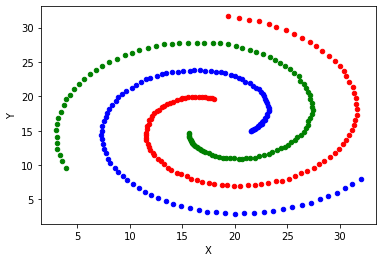

In [4]:
#https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas

ax1 = cluster1.plot(kind='scatter', x='X', y='Y', color='r')    
ax2 = cluster2.plot(kind='scatter', x='X', y='Y', color='g', ax=ax1)    
ax3 = cluster3.plot(kind='scatter', x='X', y='Y', color='b', ax=ax1)

print(ax1 == ax2 == ax3) 

# 2. (40 pts) Implement the k-means clustering algorithm. And do the following: 


# 2a. Run your k-means algorithm on the given dataset setting the value k=3 (because visually we only have 3 clusters to worry about). And do not forget to randomly initialize the 3 centroids. 

In [5]:
#https://github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch/blob/master/K%20Means%20Clustering.py


style.use('ggplot')

class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 50000):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, df):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = df[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for features in df:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, df):
        distances = [np.linalg.norm(df - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def sse(self):

        squared_errors = (self.df - self.model.pred(self.df)) ** 2
        return np.sum(squared_errors)


    def rand_index_score(self,clusters, classes):
        tp_plus_fp = comb(np.bincount(clusters), 2).sum()
        tp_plus_fn = comb(np.bincount(classes), 2).sum()
        A = np.c_[(clusters, classes)]
        tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
                 for i in set(clusters))
        fp = tp_plus_fp - tp
        fn = tp_plus_fn - tp
        tn = comb(len(A), 2) - tp - fp - fn
        return (tp + tn) / (tp + fp + fn + tn)


In [6]:
#initialize random cluster
print("\nRandom Clusters")

def rand(cluster, k =3):
    rand = cluster.sample(k)
    rand = pd.DataFrame(rand)
    rando = rand.iloc[:,:2]
    #print(rando)

    return rando
rando = rand(cluster)
rando1 = rando.iloc[0]
rando2 = rando.iloc[1]
rando3 = rando.iloc[2]
print(rando)


Random Clusters
         X      Y
132  31.15  15.05
142  26.90   9.10
222   5.60  22.50


# MS1: (10 pts) Please draw the clustering results (like Figure 1) for all of task 2. 

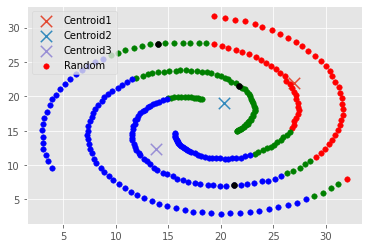

In [7]:
c1_val = cluster.values
kmeans = K_Means(3)
kmeans.fit(c1_val)

colors = 10*["r", "g", "b"]

for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], s = 130, marker = "x")


for classification in kmeans.classes:
    color = colors[classification]
    for features in kmeans.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
test_points = rand(cluster)
plt.scatter(test_points["X"], test_points["Y"], color = "black", label = "Random")
plt.legend(["Centroid1", "Centroid2", "Centroid3", "Random"])


plt.show()

In [8]:
def random_cent(df, k):
    random_index = [np.random.randint(len(df))for i in range(k)]
    centroids = []
    for i in random_index:
        centroids.append(df.iloc[i, :])
    return centroids

def assign_cluster(df, initial_centroids, k):
    clusters = []
    for i in range(len(df)):
        euclidean_dist = []
        for j in range(k):
            euclidean_dist.append(np.linalg.norm(np.subtract(df.iloc[i].to_numpy(),initial_centroids[j])))
        index = np.argmin(euclidean_dist)
        clusters.append(index)
    return np.asarray(clusters)

def recompute_centroid(df, clusters, k):
    centroids = []
    for i in range(k):
        temp_array = []
        for j in range(len(df)):
            if clusters[j] == i:
                temp_array.append(df.iloc[j, :].to_numpy())
        centroids.append(np.mean(temp_array, axis=0))
    return np.asarray(centroids)

def difference(prev, nxt):
    diff = 0
    for i in range(len(prev)):
        diff += np.linalg.norm(prev[i]- nxt[i])
    return diff

def k_means(df, k):
    c_prev = random_cent(df, k)
    clusters = assign_cluster(df, c_prev, k)
    diff = 100
    while diff > 0.0001:
        clusters = assign_cluster(df, c_prev, k)
        c_new = recompute_centroid(df, clusters, k)
        diff = difference(c_prev, c_new)
        c_prev=c_new
    return clusters, c_prev

In [9]:
redo_clusters, redo_centroids = k_means(clusterXY, k=3)
print("Prediction clusters \n",redo_clusters)
print("\nPrediction centroids:\n", redo_centroids)

Prediction clusters 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]

Prediction centroids:
 [[10.42783019 16.8259434 ]
 [21.94433962  9.81462264]
 [23.119      22.7565    ]]


In [10]:
print("Using the new numbers to reassign the clusters")
reassign_cluster1 = []
reassign_cluster2 = []
reassign_cluster3 = []

row_number_for_cluster1 = np.where(redo_clusters == 0)
for row_number_for_cluster1 in row_number_for_cluster1:
    reassign_cluster1.append(clusterXY.iloc[row_number_for_cluster1,:])
reassign_cluster1 = np.asarray(reassign_cluster1)
print("\nNew cluster1: \n",reassign_cluster1)


row_number_for_cluster2 = np.where(redo_clusters == 1)
for row_number_for_cluster2 in row_number_for_cluster2:
    reassign_cluster2.append(clusterXY.iloc[row_number_for_cluster2,:])
reassign_cluster2 = np.asarray(reassign_cluster2)
print("\nNew cluster2: \n",reassign_cluster2)


row_number_for_cluster3 = np.where(redo_clusters == 2)
for row_number_for_cluster3 in row_number_for_cluster3:
    reassign_cluster3.append(clusterXY.iloc[row_number_for_cluster3,:])
reassign_cluster3 = np.asarray(reassign_cluster3)
print("\nNew cluster3: \n",reassign_cluster3)

Using the new numbers to reassign the clusters

New cluster1: 
 [[[11.45  6.15]
  [10.9   6.65]
  [10.3   7.25]
  [ 9.7   7.85]
  [ 9.35  8.35]
  [ 8.9   9.05]
  [ 8.55  9.65]
  [ 8.15 10.35]
  [ 7.95 10.95]
  [ 7.75 11.7 ]
  [ 7.55 12.35]
  [ 7.45 13.  ]
  [ 7.35 13.75]
  [ 7.3  14.35]
  [ 7.35 14.95]
  [ 7.35 15.75]
  [ 7.55 16.35]
  [ 7.7  16.95]
  [ 7.8  17.55]
  [ 8.05 18.15]
  [ 8.3  18.75]
  [ 8.65 19.3 ]
  [ 8.9  19.85]
  [ 9.3  20.3 ]
  [ 9.65 20.8 ]
  [10.2  21.25]
  [10.6  21.65]
  [11.1  22.15]
  [11.55 22.45]
  [11.95 22.7 ]
  [12.55 23.  ]
  [13.05 23.2 ]
  [13.45 23.4 ]
  [14.   23.55]
  [14.55 23.6 ]
  [13.6   9.65]
  [13.25 10.1 ]
  [12.95 10.55]
  [12.65 10.9 ]
  [12.35 11.4 ]
  [12.2  11.75]
  [11.95 12.2 ]
  [11.8  12.65]
  [11.75 13.05]
  [11.55 13.6 ]
  [11.55 14.  ]
  [11.55 14.35]
  [11.55 14.7 ]
  [11.6  15.25]
  [11.65 15.7 ]
  [11.8  16.05]
  [11.85 16.5 ]
  [12.   16.75]
  [12.15 17.2 ]
  [12.3  17.6 ]
  [12.55 17.85]
  [12.8  18.05]
  [13.1  18.4 ]
  [13.3 

# 2b. Once your k-means algorithm has converged above, stop and from your clustering result compute the intrinsic performance metric: Sum of Squared Error, SSE (smaller the better), and the extrinsic performance metric: Rand-Index, RI (higher the better). For the definition of both, please continue reading. 

In [11]:
centroids = kmeans.centroids
print(centroids)
df_centroids = pd.DataFrame.from_dict(centroids)
df_centroids.columns = "X", "Y", "Cluster_Number"
print(df_centroids)
centroids_all = df_centroids.iloc[: , :-1]

centroids_all

{0: array([26.94098361, 21.9942623 ,  1.47540984]), 1: array([20.26683673, 18.9744898 ,  2.3877551 ]), 2: array([13.81568627, 12.40784314,  1.99346405])}
           X          Y  Cluster_Number
0  26.940984  20.266837       13.815686
1  21.994262  18.974490       12.407843
2   1.475410   2.387755        1.993464


,X,Y
0,26.940984,20.266837
1,21.994262,18.974490
2,1.475410,2.387755


In [12]:
centroid1 = centroids_all.iloc[0]
centroid2 = centroids_all.iloc[1]
centroid3 = centroids_all.iloc[2]


In [13]:
def sse(rand1, rand2, rand3):
    squared_errors1 = 0
    squared_errors2 = 0
    squared_errors3 = 0

    for i in range(len(rand1)):
        squared_errors1 = (dist(cluster1.iloc[i, :].to_numpy(), centroid1.to_numpy()))
        
        squared_errors1 +=  squared_errors1 #(squared_errors1 ** .5)/ len(cluster1)


    for i in range(len(rand2)):
        squared_errors2 = (dist(cluster2.iloc[i, :].to_numpy(), centroid2.to_numpy())) 
        squared_errors2 += squared_errors2#(squared_errors2 **.5)/ len(cluster2)

    for i in range(len(rand3)):
        squared_errors3 = (dist(cluster3.iloc[i, :].to_numpy(), centroid3.to_numpy())) 
        squared_errors3 += squared_errors3 #(squared_errors3 ** .5) / len(cluster3)




    sse = squared_errors1 + squared_errors2 + squared_errors3
    return sse

seen = sse(cluster1, cluster2, cluster3)
print(seen)

80.56866242755896


In [14]:
def sse_correct(reassign_cluster1, reassign_cluster2, reassign_cluster3):
    square_errors1 = 0
    square_errors2 = 0
    square_errors3 = 0
    
    for i in range(len(reassign_cluster1)):
        square_errors1 = sqrt(np.linalg.norm(np.subtract(reassign_cluster1[i],redo_centroids[0])))
        square_errors1 +=  square_errors1

    
    for i in range(len(reassign_cluster2)):
        square_errors2 = sqrt(np.linalg.norm(np.subtract(reassign_cluster2[i],redo_centroids[1])))
        square_errors2 +=  square_errors2


    for i in range(len(reassign_cluster3)):
        square_errors3 = sqrt(np.linalg.norm(np.subtract(reassign_cluster3[i],redo_centroids[2])))
        square_errors3 +=  square_errors3

    SSE = square_errors1 + square_errors2 + square_errors3
    return SSE
seen_again = sse_correct(reassign_cluster1, reassign_cluster2, reassign_cluster3)
print(seen_again)

47.996862358723895


In [15]:
#https://stackoverflow.com/questions/8193563/predicting-values-with-k-means-clustering-algorithm
print("Y Predict")
pred = []
def predict(data, centroids):
    centroids, data = np.array(centroids), np.array(data)
    distances = []
    closests = []
    for unit in data:
        for center in centroids:
            distances.append(np.sum((unit - center) ** 2))                
    distances = np.reshape(distances, data.shape)
    closest_centroid = [np.argmin(dist) for dist in distances]
    closests.append(closest_centroid)
    return closests

y_predict = predict(cluster, df_centroids)
y_pred = [item for sublist in y_predict for item in sublist]
print((y_pred))

Y Predict
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
def confusion_matrix(y_actual, y_pred):
    # the function takes two arrays of target variable "y": y_actual and y_pred
    #    denoting ground truth class labels and predicted class labels for the N samples
    #    when N is the length of both the arrays.
    # The function should return a list of 4 metrics: TN, FP, FN, TP (in this order).
    assert(len(y_actual)==len(y_pred))
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    #@TODO
    
    for i in range(len(y_actual)):
        if y_pred[i] == 0 and y_actual[i] == 0:
            TN = TN + 1
        elif y_pred[i] == 0 and y_actual[i] == 1:
            FN = FN + 1
        elif y_pred[i] == 1 and y_actual[i] == 1:
            TP = TP + 1
        elif y_pred[i] == 1 and y_actual[i] == 0:
            FP = FP + 1
            

    RI = (TP + TN)/(TP + TN + FP + FN)
    
    

    return RI
RI = confusion_matrix(cluster_number , redo_clusters)
print("Using confusion matrix from HW1:", RI)

# 


Using confusion matrix from HW1: 0.4852941176470588


In [17]:
# from sklearn.metrics import confusion_matrix
# TN, FP, FN, TP = confusion_matrix(cluster_number , y_pred)#Expected to print: [1, 0, 1, 2]
# RI_lib = (TP + TN)/(TP + TN + FP + FN)
# print("Using built in library", RI_lib)

# MS1: (10 pts) Please draw the clustering results (like Figure 1) for all of task 2. 

In [18]:
redo_centroids

array([[10.42783019, 16.8259434 ],
       [21.94433962,  9.81462264],
       [23.119     , 22.7565    ]])

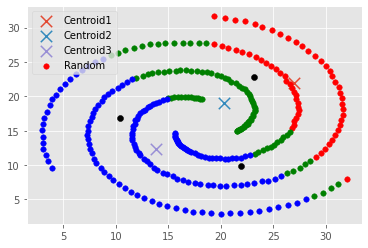

In [19]:
c1_val = cluster.values
kmeans = K_Means(3)
kmeans.fit(c1_val)

colors = 10*["r", "g", "b"]

for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], s = 130, marker = "x")

    

for classification in kmeans.classes:
    color = colors[classification]
    for features in kmeans.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
        
test_points2b = redo_centroids
test_points2b = pd.DataFrame(test_points2b, columns = ["X","Y"])
plt.scatter(test_points2b["X"], test_points2b["Y"], color = "black", label = "Random")
plt.legend(["Centroid1", "Centroid2", "Centroid3", "Random"])


plt.show()

# 2c. Repeat Task (2.a) & (2.b) another 9 (nine) times randomizing again the initial centroids, and report  out of the 10 runs of k-means what is the best SSE & RI you could get.   

# MS1: (10 pts) Please draw the clustering results (like Figure 1) for all of task 2.   

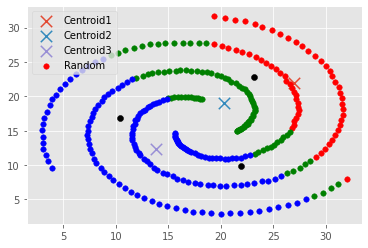

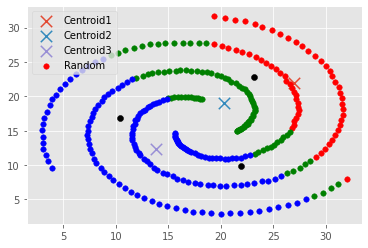

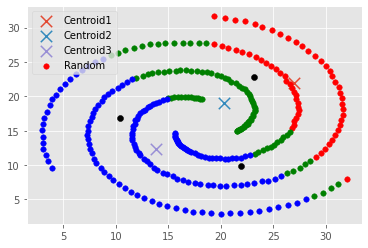

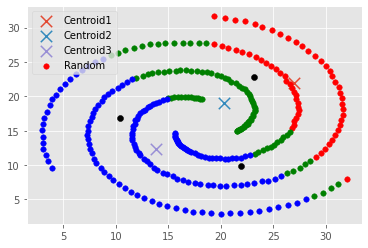

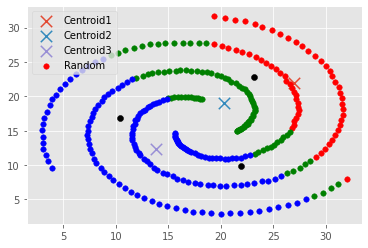

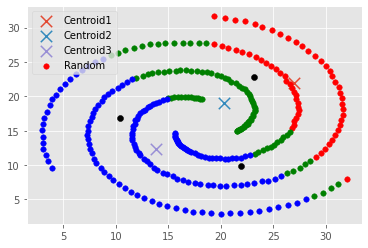

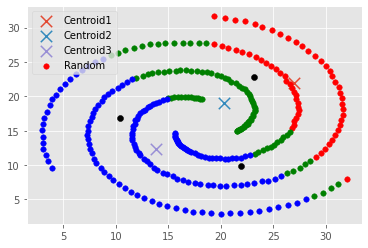

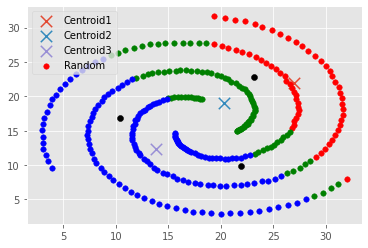

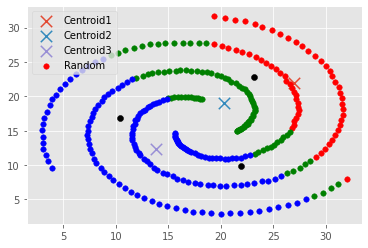

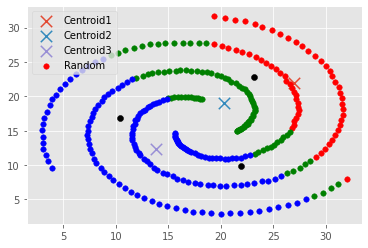

Best SSE 47.996862358723895
Best RI 0.4852941176470588


In [95]:
sse_list = []
sse_list.append(seen_again)
RI_list = []
RI_list.append(RI)

i=0
while i < 10:
    sse_runs = sse_correct(reassign_cluster1,reassign_cluster2, reassign_cluster3)
    RI_runs = confusion_matrix(cluster_number , redo_clusters)
    sse_list.append(sse_runs)
    RI_list.append(RI_runs)
    
    colors = 10*["r", "g", "b"]

    for centroid in kmeans.centroids:
        plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], s = 130, marker = "x")



    for classification in kmeans.classes:
        color = colors[classification]
        for features in kmeans.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)

    test_points2c = redo_centroids
    test_points2c = pd.DataFrame(test_points2b, columns = ["X","Y"])
    plt.scatter(test_points2c["X"], test_points2c["Y"], color = "black", label = "Random")
    plt.legend(["Centroid1", "Centroid2", "Centroid3", "Random"])
    
    plt.show()
    i += 1
    



print("Best SSE", max(sse_list))
print("Best RI", min(RI_list))

# 3. (40 pts) Implement the Hierarchical clustering algorithm. And do the following: 

In [21]:
#the answers that I am supposed to get, not submitting this part, just for personal reference. 
# from scipy.cluster.hierarchy import dendrogram, linkage
# from sklearn.cluster import AgglomerativeClustering
# X = linkage(cluster, 'single')
# Y = linkage(cluster, 'complete')
# Z = linkage(cluster, 'average')
# B = linkage(cluster, 'centroid')
# dendrogram(X)
# plt.show()
# print("\nSingle linkage\n", X)

# agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
# y_predict_single = agg_clustering.fit_predict(clusterXY)
# print("\nCosine\n",y_predict_single)

# 3a. Using the “single linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI. 

In [22]:
high = clusterXY.copy()

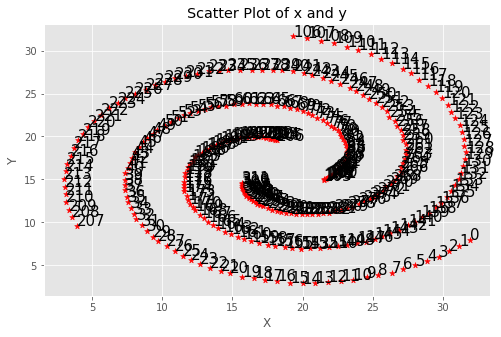

In [23]:
#https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/

plt.figure(figsize=(8,5))
plt.scatter(clusterXY['X'], clusterXY['Y'], c='r', marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of x and y')
for j in clusterXY.itertuples():
    plt.annotate(j.Index, (j.X, j.Y), fontsize=15)

plt.show()


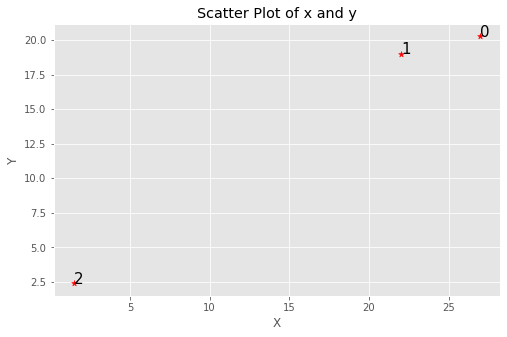

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(centroids_all['X'], centroids_all['Y'], c='r', marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of x and y')
for j in centroids_all.itertuples():
    plt.annotate(j.Index, (j.X, j.Y), fontsize=15)

plt.show()

In [25]:
##https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/
print("Distance matrix using euclidean distance\n")
distance = pd.DataFrame(squareform(pdist(high[['X', 'Y']]), 'euclidean'), columns=high.index.values, index=high.index.values)
distance

Distance matrix using euclidean distance



,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.000000,1.030776,1.984943,2.977415,3.881044,4.890041,5.841447,6.767570,7.727386,8.540785,...,16.760817,16.854970,16.950074,17.077031,17.126369,17.240940,17.404023,17.475125,17.566801,17.604332
1,1.030776,0.000000,0.955249,1.947434,2.850439,3.860052,4.813003,5.741298,6.705595,7.522799,...,16.222284,16.323067,16.424753,16.554833,16.611592,16.735068,16.905990,16.986833,17.090641,17.133009
2,1.984943,0.955249,0.000000,0.992472,1.900658,2.912473,3.869431,4.802083,5.774296,6.597348,...,15.824190,15.931416,16.039483,16.172353,16.236456,16.368567,16.546903,16.637307,16.752985,16.800074
3,2.977415,1.947434,0.992472,0.000000,0.917878,1.929378,2.890069,3.826879,4.807546,5.636488,...,15.430489,15.544292,15.658863,15.794303,15.866080,16.007030,16.192745,16.293097,16.421099,16.473084
4,3.881044,2.850439,1.900658,0.917878,0.000000,1.012423,1.972308,2.909038,3.891015,4.721493,...,14.946990,15.066270,15.186260,15.323593,15.401948,15.550322,15.742061,15.850946,15.989528,16.045716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,17.240940,16.735068,16.368567,16.007030,15.550322,15.152970,14.751017,14.368368,13.896852,13.541972,...,0.790569,0.632456,0.474342,0.353553,0.206155,0.000000,0.223607,0.412311,0.657647,0.756637
308,17.404023,16.905990,16.546903,16.192745,15.742061,15.351303,14.955016,14.577380,14.110369,13.758815,...,1.012423,0.854400,0.696419,0.570088,0.427200,0.223607,0.000000,0.200000,0.450000,0.550000
309,17.475125,16.986833,16.637307,16.293097,15.850946,15.470052,15.082855,14.713939,14.255613,13.911326,...,1.202082,1.044031,0.886002,0.764853,0.618466,0.412311,0.200000,0.000000,0.250000,0.350000
310,17.566801,17.090641,16.752985,16.421099,15.989528,15.620819,15.244835,14.886655,14.439010,14.103634,...,1.443087,1.285496,1.128051,1.011187,0.863134,0.657647,0.450000,0.250000,0.000000,0.100000


In [26]:
#https://github.com/ayechico21/HAC/blob/master/HAC.ipynb
def SingleLinkage(a,b):

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return min(dis)

clusters_single = [[i] for i in clusterXY.index] 
points_s = [ [list(i)] for i in clusterXY.values]
nSingle = 3 #using dendrogram and getting optimum number of clusters 


def EuclideanDistance(a,b):
    return sqrt(((np.array(a) -np.array(b))**2).sum())

In [27]:
while len(clusters_single) > nSingle:

    #dm =Distance Matrix
    dm = np.zeros((len(clusters_single),len(clusters_single)))
    
    for i in range(len(clusters_single)):
        for j in range(len(clusters_single)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = SingleLinkage(points_s[i],points_s[j])
               
            

    m = dm.min()
    min_point= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clusters_to_merge = [clusters_single[i] for i in set(min_point[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clusters_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    points_to_merge = [points_s[i] for i in set(min_point[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points_s in points_to_merge for point in points_s]
    
    #adding new clusters and their cordinates
    clusters_single.append(new_cluster)
    points_s.append(new_point)

    #Removing the clusters which were merged
    for i in clusters_to_merge:
        clusters_single.remove(i)   
    for i in points_to_merge:
        points_s.remove(i)

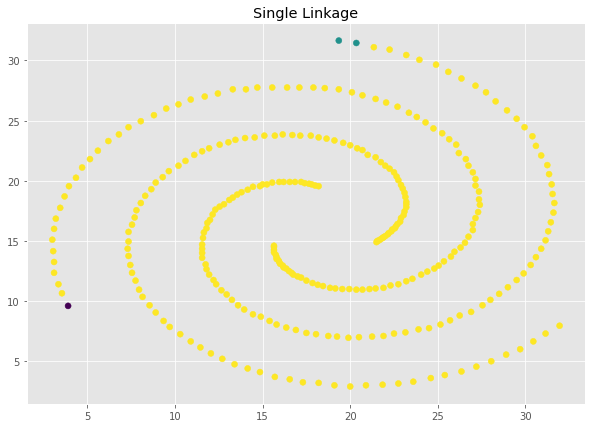

In [28]:
label = np.zeros((len(clusterXY.index)),dtype=int)
category= 0

for cluster in clusters_single:
    for point in cluster:
        label[point] = category
    category+=1
    
plt.figure(figsize=(10,7))
plt.title("Single Linkage")  
plt.scatter(clusterXY['X'],clusterXY['Y'],c=label)
plt.show()

In [29]:
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [30]:
points_single = [item for sublist in points_s for item in sublist]

In [31]:
points_single = pd.DataFrame(points_single, columns=["X","Y"])
print(points_single)

         X      Y
0     3.90   9.60
1    19.35  31.65
2    20.35  31.45
3    21.35  31.10
4    22.25  30.90
..     ...    ...
307  26.35   4.15
308  31.15   7.30
309  30.45   6.65
310  29.70   6.00
311  28.90   5.55

[312 rows x 2 columns]


In [32]:
points_single["Cluster_Number"] = label
points_single

,X,Y,Cluster_Number
0,3.90,9.60,2
1,19.35,31.65,2
2,20.35,31.45,2
3,21.35,31.10,2
4,22.25,30.90,2
...,...,...,...
307,26.35,4.15,2
308,31.15,7.30,2
309,30.45,6.65,2
310,29.70,6.00,2


In [33]:
cluster_single1 = points_single.loc[points_single["Cluster_Number"]==0].iloc[: , :-1]
cluster_single2 = points_single.loc[points_single["Cluster_Number"]==1].iloc[: , :-1]
cluster_single3 = points_single.loc[points_single["Cluster_Number"]==2].iloc[: , :-1]

In [34]:
centroid_single1 = cluster_single1
centroid_single2 = cluster_single2.sum()/cluster_single2.shape[0]
centroid_single3 = cluster_single3.sum()/cluster_single3.shape[0]

In [35]:
squared_single_errors1 = 0
squared_single_errors2 = 0
squared_single_errors3 = 0

#since centroid and cluster of cluster_single1 and centroid_single1 are the same, squared_single_error1 = 0


for i in range(len(cluster_single2)):
    squared_single_errors2 = (dist(cluster_single2.iloc[i, :].to_numpy(), centroid_single2.to_numpy())) 
    squared_single_errors2 += squared_single_errors2#(squared_errors2 **.5)/ len(cluster2)

for i in range(len(cluster_single3)):
    squared_single_errors3 = (dist(cluster_single3.iloc[i, :].to_numpy(), centroid_single3.to_numpy())) 
    squared_single_errors3 += squared_single_errors3 #(squared_errors3 ** .5) / len(cluster3)




sse_single = squared_single_errors1 + squared_single_errors2 + squared_single_errors3
sse_single

30.79116260126739

In [36]:
RI_single = confusion_matrix(cluster_number , label)
RI_single

1.0

# 3b. Using the “complete linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI. 

In [37]:
def CompleteLinkage(a,b):

    #list of all the point to point distances b/w the two clusters
    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return max(dis)

In [38]:
nComplete = 3
clusters_complete = [[i] for i in clusterXY.index] 
points_complete = [ [list(i)] for i in clusterXY.values]
while len(clusters_complete) > nComplete:

    #Distance Matrix
    dm = np.zeros((len(clusters_complete),len(clusters_complete)))
    
    for i in range(len(clusters_complete)):
        for j in range(len(clusters_complete)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = CompleteLinkage(points_complete[i],points_complete[j])
               
            

    m = dm.min()
    min_point= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clusters_to_merge = [clusters_complete[i] for i in set(min_point[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clusters_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    points_to_merge = [points_complete[i] for i in set(min_point[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points_complete in points_to_merge for point in points_complete]
    
    #adding new clusters and their cordinates
    clusters_complete.append(new_cluster)
    points_complete.append(new_point)

    #Removing the clusters which were merged
    for i in clusters_to_merge:
        clusters_complete.remove(i)   
    for i in points_to_merge:
        points_complete.remove(i)


In [39]:
#To map the category of each training example in dataset
label_complete = np.zeros((len(clusterXY.index)),dtype=int)
category= 0

for cluster in clusters_complete:
    for point in cluster:
        label_complete[point] = category
    category+=1

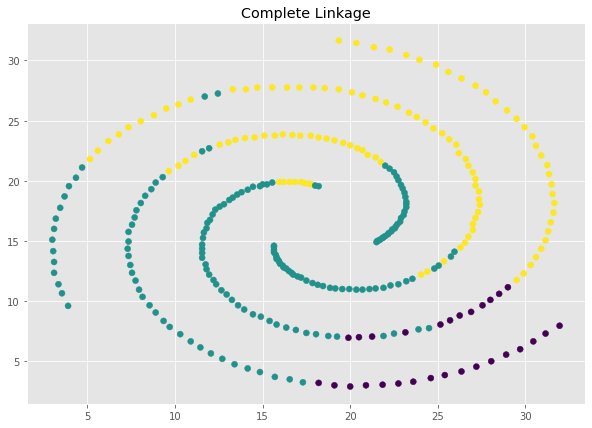

In [40]:
plt.figure(figsize=(10,7))
plt.title("Complete Linkage")  
plt.scatter(clusterXY['X'],clusterXY['Y'],c=label_complete)
plt.show()

In [41]:
# print(label_complete)
# print(points_complete)

In [42]:
points_complete = [item for sublist in points_complete for item in sublist]
points_complete = pd.DataFrame(points_complete, columns=["X","Y"])
print(points_complete)

         X      Y
0    18.20   3.20
1    20.90   3.00
2    20.00   2.90
3    19.10   3.00
4    23.15   7.40
..     ...    ...
307  15.55  27.75
308  12.55  23.00
309  15.10  23.75
310  14.00  23.55
311  14.55  23.60

[312 rows x 2 columns]


In [43]:
points_complete["Cluster_Number"] = label_complete
points_complete

,X,Y,Cluster_Number
0,18.20,3.20,0
1,20.90,3.00,0
2,20.00,2.90,0
3,19.10,3.00,0
4,23.15,7.40,0
...,...,...,...
307,15.55,27.75,1
308,12.55,23.00,1
309,15.10,23.75,1
310,14.00,23.55,1


In [44]:
cluster_complete1 = points_complete.loc[points_complete["Cluster_Number"]==0].iloc[: , :-1]
cluster_complete2 = points_complete.loc[points_complete["Cluster_Number"]==1].iloc[: , :-1]
cluster_complete3 = points_complete.loc[points_complete["Cluster_Number"]==2].iloc[: , :-1]

In [45]:
centroid_complete1 = cluster_complete1.sum()/cluster_complete1.shape[0]
centroid_complete2 = cluster_complete2.sum()/cluster_complete2.shape[0]
centroid_complete3 = cluster_complete3.sum()/cluster_complete3.shape[0]

In [46]:
squared_complete_errors1 = 0
squared_complete_errors2 = 0
squared_complete_errors3 = 0

for i in range(len(cluster_complete1)):
    squared_complete_errors1 = (dist(cluster_complete1.iloc[i, :].to_numpy(), centroid_complete1.to_numpy())) 
    squared_complete_errors1 += squared_complete_errors1#(squared_errors2 **.5)/ len(cluster2)


for i in range(len(cluster_complete2)):
    squared_complete_errors2 = (dist(cluster_complete2.iloc[i, :].to_numpy(), centroid_complete2.to_numpy())) 
    squared_complete_errors2 += squared_complete_errors2#(squared_errors2 **.5)/ len(cluster2)

for i in range(len(cluster_complete3)):
    squared_complete_errors3 = (dist(cluster_complete3.iloc[i, :].to_numpy(), centroid_complete3.to_numpy())) 
    squared_complete_errors3 += squared_complete_errors3 #(squared_errors3 ** .5) / len(cluster3)




sse_complete = squared_complete_errors1 + squared_complete_errors2 + squared_complete_errors3
sse_complete

72.46439778753937

In [47]:
RI_complete = confusion_matrix(cluster_number , label_complete)
RI_complete

0.8032786885245902

# 3c. Using the “average linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI. 

In [48]:
def AverageLinkage(a,b):

    dis = []

    for i in a:
        for j in b:
            d = EuclideanDistance(i,j) 
            dis.append(d)
    return mean(dis)

clusters_avg = [[i] for i in clusterXY.index] 
points_avg = [ [list(i)] for i in clusterXY.values]
navg = 3 #using dendrogram and getting optimum number of clusters 

In [49]:
while len(clusters_avg) > navg:

    #Distance Matrix
    dm = np.zeros((len(clusters_avg),len(clusters_avg)))
    
    for i in range(len(clusters_avg)):
        for j in range(len(clusters_avg)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = AverageLinkage(points_avg[i],points_avg[j])
               
            

    m = dm.min()
    min_point= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clusters_to_merge = [clusters_avg[i] for i in set(min_point[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clusters_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    points_to_merge = [points_avg[i] for i in set(min_point[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points_avg in points_to_merge for point in points_avg]
    
    #adding new clusters and their cordinates
    clusters_avg.append(new_cluster)
    points_avg.append(new_point)

    #Removing the clusters which were merged
    for i in clusters_to_merge:
        clusters_avg.remove(i)   
    for i in points_to_merge:
        points_avg.remove(i)


In [50]:
label_avg = np.zeros((len(clusterXY.index)),dtype=int)
category= 0

for cluster in clusters_avg:
    for point in cluster:
        label_avg[point] = category
    category+=1

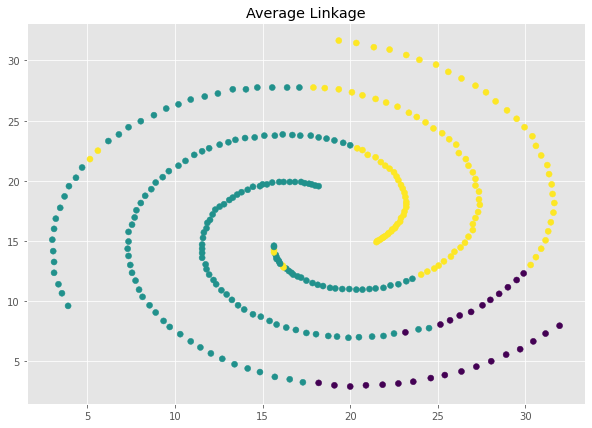

In [51]:
plt.figure(figsize=(10,7))
plt.title("Average Linkage")  
plt.scatter(clusterXY['X'],clusterXY['Y'],c=label_avg)
plt.show()

In [52]:
points_avg = [item for sublist in points_avg for item in sublist]

In [53]:
points_avg = pd.DataFrame(points_avg, columns=["X","Y"])
print(points_avg)

         X      Y
0    18.20   3.20
1    20.90   3.00
2    20.00   2.90
3    19.10   3.00
4    25.40   3.85
..     ...    ...
307  23.05  17.15
308  22.85  16.60
309  22.70  16.40
310  23.20  17.80
311  23.10  17.45

[312 rows x 2 columns]


In [54]:
points_avg["Cluster_Number"] = label
points_avg

,X,Y,Cluster_Number
0,18.20,3.20,2
1,20.90,3.00,2
2,20.00,2.90,2
3,19.10,3.00,2
4,25.40,3.85,2
...,...,...,...
307,23.05,17.15,2
308,22.85,16.60,2
309,22.70,16.40,2
310,23.20,17.80,2


In [55]:
cluster_avg1 = points_avg.loc[points_avg["Cluster_Number"]==0].iloc[: , :-1]
cluster_avg2 = points_avg.loc[points_avg["Cluster_Number"]==1].iloc[: , :-1]
cluster_avg3 = points_avg.loc[points_avg["Cluster_Number"]==2].iloc[: , :-1]

In [56]:
centroid_avg1 = cluster_avg1.sum()/cluster_avg1.shape[0]
centroid_avg2 = cluster_avg2.sum()/cluster_avg2.shape[0]
centroid_avg3 = cluster_avg3.sum()/cluster_avg3.shape[0]

In [57]:
squared_avg_errors1 = 0
squared_avg_errors2 = 0
squared_avg_errors3 = 0

for i in range(len(cluster_avg1)):
    squared_avg_errors1 = (dist(cluster_avg1.iloc[i, :].to_numpy(), centroid_avg1.to_numpy())) 
    squared_avg_errors1 += squared_avg_errors1#(squared_errors2 **.5)/ len(cluster2)


for i in range(len(cluster_avg2)):
    squared_avg_errors2 = (dist(cluster_avg2.iloc[i, :].to_numpy(), centroid_avg2.to_numpy())) 
    squared_avg_errors2 += squared_avg_errors2#(squared_errors2 **.5)/ len(cluster2)

for i in range(len(cluster_avg3)):
    squared_avg_errors3 = (dist(cluster_avg3.iloc[i, :].to_numpy(), centroid_avg3.to_numpy())) 
    squared_avg_errors3 += squared_avg_errors3 #(squared_errors3 ** .5) / len(cluster3)


sse_avg = squared_avg_errors1 + squared_avg_errors2 + squared_avg_errors3
sse_avg

14.280451195720516

In [58]:
RI_avg = confusion_matrix(cluster_number , label_avg)
RI_avg

0.8450704225352113

# 3d. Using the “centroid linkage” method, run the hierarchical clustering algorithm on the dataset, and get a 3-cluster result (by cutting the dendrogram at a certain height), and report SSE and RI. 

In [96]:
print("This part takes a really long time, idk if its right, but the rest of it would follow like the rest",
      "of the clusterings")

def centroid_link(a,b):
    c1 = []
    c2 = []
    dis = []
    for i in a:
        for j in b:
            d = len(i)*EuclideanDistance(i,j) + len(j)*EuclideanDistance(i,j)
            dis.append(d)
    return sum(dis)
#dist(s,t) = ||c_s-c_t||_2
#abs(c1) - abs(c2) = 1/ni nj(sum di dj) for all numbers in set A and B 
#len(i)*EuclideanDistance(i,j) + len(j)*EuclideanDistance(i,J)

This part takes a really long time, idk if its right, but the rest of it would follow like the rest of the clusterings


In [85]:
# from scipy.cluster.hierarchy import centroid, fcluster
# z = centroid(clusterXY)
# z

In [ ]:
nCentroid = 3
clusters_centroid = [[i] for i in clusterXY.index] 
points_centroid = [ [list(i)] for i in clusterXY.values]
while len(clusters_centroid) > nCentroid:

    #Distance Matrix
    dm = np.zeros((len(clusters_centroid),len(clusters_centroid)))
    
    for i in range(len(clusters_centroid)):
        for j in range(len(clusters_centroid)):
            if i == j:
                dm[i][j] = 1000 
            else:
                dm[i][j] = centroid_link(points_centroid[i],points_centroid[j])
               
            

    m = dm.min()
    min_point= np.where(dm == m) #array of indices of min distance points

    #contains the clusters to be merged 
    clusters_to_merge = [clusters_centroid[i] for i in set(min_point[0])]

    #New cluster formed after merging
    new_cluster = [ point for cluster in clusters_to_merge for point in cluster]
    
    #contains the cordinates of the clusters to be merged
    points_to_merge = [points_centroid[i] for i in set(min_point[0])]

    #contains the cordinates of the new cluster
    new_point = [point for points_centroid in points_to_merge for point in points_centroid]    
    
    #adding new clusters and their cordinates
    clusters_centroid.append(new_cluster)
    points_centroid.append(new_point)

    #Removing the clusters which were merged
    for i in clusters_to_merge:
        clusters_centroid.remove(i)   
    for i in points_to_merge:
        points_centroid.remove(i)


In [ ]:
label_centroid = np.zeros((len(clusterXY.index)),dtype=int)
category= 0

for cluster in clusters_centroid:
    for point in cluster:
        label_centroid[points_centroid] = category
    category+=1
    
plt.figure(figsize=(10,7))
plt.title("Centroid Linkage")  
plt.scatter(clusterXY['X'],clusterXY['Y'],c=label_centroid)
plt.show()

In [ ]:
points_centroid = [item for sublist in points_centroid for item in sublist]
points_centroid = pd.DataFrame(points_centroid, columns=["X","Y"])
points_centroid["Cluster_Number"] = label_centroid

In [ ]:
cluster_centroid1 = points_centroid.loc[points_centroid["Cluster_Number"]==0].iloc[: , :-1]
cluster_centroid2 = points_centroid.loc[points_centroid["Cluster_Number"]==1].iloc[: , :-1]
cluster_centroid3 = points_centroid.loc[points_centroid["Cluster_Number"]==2].iloc[: , :-1]

centroid_centroid1 = cluster_centroid1.sum()/cluster_centroid1.shape[0]
centroid_centroid2 = cluster_centroid2.sum()/cluster_centroid2.shape[0]
centroid_centroid3 = cluster_centroid3.sum()/cluster_centroid3.shape[0]

In [ ]:
squared_centroid_errors1 = 0
squared_centroid_errors2 = 0
squared_centroid_errors3 = 0

#since centroid and cluster of cluster_single1 and centroid_single1 are the same, squared_single_error1 = 0
for i in range(len(cluster_centroid1)):
    squared_centroid_errors1 = (dist(cluster_centroid1.iloc[i, :].to_numpy(), centroid_centroid1.to_numpy())) 
    squared_centroid_errors1 += squared_centroid_errors1#(squared_errors2 **.5)/ len(cluster2)

for i in range(len(cluster_centroid2)):
    squared_centroid_errors2 = (dist(cluster_centroid2.iloc[i, :].to_numpy(), centroid_centroid2.to_numpy())) 
    squared_centroid_errors2 += squared_centroid_errors2#(squared_errors2 **.5)/ len(cluster2)

for i in range(len(cluster_centroid3)):
    squared_centroid_errors3 = (dist(cluster_centroid3.iloc[i, :].to_numpy(), centroid_centroid3.to_numpy())) 
    squared_centroid_errors3 += squared_centroid_errors3 #(squared_errors3 ** .5) / len(cluster3)




sse_centroid = squared_centroid_errors1 + squared_centroid_errors2 + squared_centroid_errors3
sse_centroid

In [ ]:
RI_centroid = confusion_matrix(cluster_number , label_centroid)
RI_centroid

# 3e  Please comment, out of the 4 clustering results (3.a), (3.b), (3.c) and (3.d) which method gets you the best SSE as well as RI. 

In [89]:
print("Single:",sse_single)
print("Complete:",sse_complete)
print("Average:",sse_avg)


print("\n\nRI single:",RI_single)
print("RI complete:", RI_complete)
print("RI avg:",RI_avg)


print("Out of the 4 clustering results, average linkage gives me the best SSE and single gives me the best RI")

Single: 30.79116260126739
Complete: 72.46439778753937
Average: 14.280451195720516


RI single: 1.0
RI complete: 0.8032786885245902
RI avg: 0.8450704225352113
Out of the 4 clustering results, average linkage gives me the best SSE and single gives me the best RI


In [ ]:
print("Centroid:",sse_centroid)
print("RI Centroid:", RI_centroid)

# MS1: (10 pts) Please draw the clustering results (like Figure 1) for all of task 2. 

In [90]:
print("Drew clustering results into the answers for task 2")

Drew clustering results into the answers for task 2


# MS2: (10 pts) Please draw clustering results (like Figure 1) for all of task 3. 

In [91]:
print("Drew clustering results into the answers for task 3")

Drew clustering results into the answers for task 3


# MS3: (10 pts) Please draw the dendrograms for each of the 4 hierarchical clustering results. Hint: there are library functions to take care of the dendrogram plotting, and you are now allowed to leverage that. 

From single linkage dendrogram, optimum number of clusters is 3


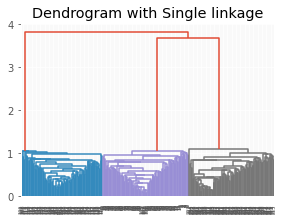

In [69]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))  

plt.subplot(2,2,1)
plt.title("Dendrogram with Single linkage")  
dend = shc.dendrogram(shc.linkage(high[['X', 'Y']], method='single'), labels=high.index)
print("From single linkage dendrogram, optimum number of clusters is 3")

From single lilnkage dendrogram, optimum number of clusters is 4


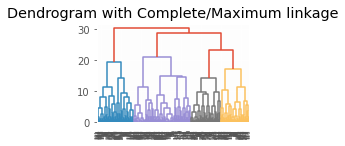

In [70]:
plt.subplot(2,2,2)
plt.title("Dendrogram with Complete/Maximum linkage")  
dendMax = shc.dendrogram(shc.linkage(high[['X', 'Y']], method='complete'), labels=high.index)
print("From single lilnkage dendrogram, optimum number of clusters is 4")

From single lilnkage dendrogram, optimum number of clusters is 5


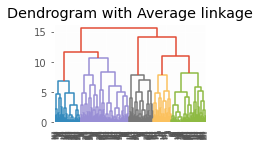

In [71]:
plt.subplot(2,2,3)  
plt.title("Dendrogram with Average linkage")  
dendAvg = shc.dendrogram(shc.linkage(high[['X', 'Y']], method='average'), labels=high.index)
print("From single lilnkage dendrogram, optimum number of clusters is 5")

From single lilnkage dendrogram, optimum number of clusters is 5


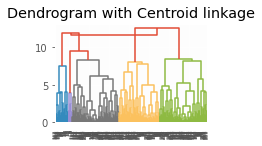

In [72]:
plt.subplot(2,2,4)  
plt.title("Dendrogram with Centroid linkage")  
dendCent = shc.dendrogram(shc.linkage(high[['X', 'Y']], method='centroid'), labels=high.index)
print("From single lilnkage dendrogram, optimum number of clusters is 5")

# MS4: (10 pts) Consider the “cosine similarity” instead of “Euclidean distance” in solving for task 3. 

In [92]:
print("Distance matrix using cosine distance\n")
distance_cosine = pd.DataFrame(squareform(pdist(high[['X', 'Y']]), 'cosine'), columns=high.index.values, index=high.index.values)
distance_cosine

Distance matrix using cosine distance



,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.000000,1.030776,1.984943,2.977415,3.881044,4.890041,5.841447,6.767570,7.727386,8.540785,...,16.760817,16.854970,16.950074,17.077031,17.126369,17.240940,17.404023,17.475125,17.566801,17.604332
1,1.030776,0.000000,0.955249,1.947434,2.850439,3.860052,4.813003,5.741298,6.705595,7.522799,...,16.222284,16.323067,16.424753,16.554833,16.611592,16.735068,16.905990,16.986833,17.090641,17.133009
2,1.984943,0.955249,0.000000,0.992472,1.900658,2.912473,3.869431,4.802083,5.774296,6.597348,...,15.824190,15.931416,16.039483,16.172353,16.236456,16.368567,16.546903,16.637307,16.752985,16.800074
3,2.977415,1.947434,0.992472,0.000000,0.917878,1.929378,2.890069,3.826879,4.807546,5.636488,...,15.430489,15.544292,15.658863,15.794303,15.866080,16.007030,16.192745,16.293097,16.421099,16.473084
4,3.881044,2.850439,1.900658,0.917878,0.000000,1.012423,1.972308,2.909038,3.891015,4.721493,...,14.946990,15.066270,15.186260,15.323593,15.401948,15.550322,15.742061,15.850946,15.989528,16.045716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,17.240940,16.735068,16.368567,16.007030,15.550322,15.152970,14.751017,14.368368,13.896852,13.541972,...,0.790569,0.632456,0.474342,0.353553,0.206155,0.000000,0.223607,0.412311,0.657647,0.756637
308,17.404023,16.905990,16.546903,16.192745,15.742061,15.351303,14.955016,14.577380,14.110369,13.758815,...,1.012423,0.854400,0.696419,0.570088,0.427200,0.223607,0.000000,0.200000,0.450000,0.550000
309,17.475125,16.986833,16.637307,16.293097,15.850946,15.470052,15.082855,14.713939,14.255613,13.911326,...,1.202082,1.044031,0.886002,0.764853,0.618466,0.412311,0.200000,0.000000,0.250000,0.350000
310,17.566801,17.090641,16.752985,16.421099,15.989528,15.620819,15.244835,14.886655,14.439010,14.103634,...,1.443087,1.285496,1.128051,1.011187,0.863134,0.657647,0.450000,0.250000,0.000000,0.100000


# MS5: (10 pts) Consider “L3 distance” instead of “Euclidean distance (i.e., L2 distance)” in solving for task 3. 

In [93]:
print("Distance matrix using L3 distance\n")
distance_l3 = pd.DataFrame(squareform(pdist(high[['X', 'Y']]), 'L3'), columns=high.index.values, index=high.index.values)
distance_l3

Distance matrix using L3 distance



,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.000000,1.030776,1.984943,2.977415,3.881044,4.890041,5.841447,6.767570,7.727386,8.540785,...,16.760817,16.854970,16.950074,17.077031,17.126369,17.240940,17.404023,17.475125,17.566801,17.604332
1,1.030776,0.000000,0.955249,1.947434,2.850439,3.860052,4.813003,5.741298,6.705595,7.522799,...,16.222284,16.323067,16.424753,16.554833,16.611592,16.735068,16.905990,16.986833,17.090641,17.133009
2,1.984943,0.955249,0.000000,0.992472,1.900658,2.912473,3.869431,4.802083,5.774296,6.597348,...,15.824190,15.931416,16.039483,16.172353,16.236456,16.368567,16.546903,16.637307,16.752985,16.800074
3,2.977415,1.947434,0.992472,0.000000,0.917878,1.929378,2.890069,3.826879,4.807546,5.636488,...,15.430489,15.544292,15.658863,15.794303,15.866080,16.007030,16.192745,16.293097,16.421099,16.473084
4,3.881044,2.850439,1.900658,0.917878,0.000000,1.012423,1.972308,2.909038,3.891015,4.721493,...,14.946990,15.066270,15.186260,15.323593,15.401948,15.550322,15.742061,15.850946,15.989528,16.045716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,17.240940,16.735068,16.368567,16.007030,15.550322,15.152970,14.751017,14.368368,13.896852,13.541972,...,0.790569,0.632456,0.474342,0.353553,0.206155,0.000000,0.223607,0.412311,0.657647,0.756637
308,17.404023,16.905990,16.546903,16.192745,15.742061,15.351303,14.955016,14.577380,14.110369,13.758815,...,1.012423,0.854400,0.696419,0.570088,0.427200,0.223607,0.000000,0.200000,0.450000,0.550000
309,17.475125,16.986833,16.637307,16.293097,15.850946,15.470052,15.082855,14.713939,14.255613,13.911326,...,1.202082,1.044031,0.886002,0.764853,0.618466,0.412311,0.200000,0.000000,0.250000,0.350000
310,17.566801,17.090641,16.752985,16.421099,15.989528,15.620819,15.244835,14.886655,14.439010,14.103634,...,1.443087,1.285496,1.128051,1.011187,0.863134,0.657647,0.450000,0.250000,0.000000,0.100000
